In [29]:
from simulation_toykit_kspace import *
import matplotlib.pyplot as plt
import numpy as np
degree = np.pi/180

In [30]:
wavelength = 13
NA         = 0.9
M          = 2
pitch      = 26
chief_theta= 60
theta      = chief_theta
chief_phi  = 45
phi        = chief_phi
NA_illum   = NA*2
sigma_out  = 0.8

# phi        = 0
k0               = kspace.k0(wavelength)
k_pupil          = (np.real(kspace.k(wavelength, NA) / M))
k_illum          = (np.real(kspace.k(wavelength, NA_illum) / M))

sigma_chief_ray  = kspace.theta_phi_to_sigma_xy(theta * degree, phi * degree)
chief_ray_center = [s * k0 for s in sigma_chief_ray]

RESET = "\033[0m"
BOLD = "\033[1m"
GREEN = "\033[32m"
BLUE = "\033[34m"

In [31]:
illum_left, illum_right, illum_top, illum_down = [-sigma_out, 0], [sigma_out, 0], [0, sigma_out], [0, -sigma_out]
illum_center_k = chief_ray_center
print(f"{GREEN}illum info in k-space{RESET}")
print(f"    illum center\t{illum_center_k}")
print(f"    illum left boundary\t{[k_illum * sigma_illum * -1 + k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_right)]}")
print(f"    illum right boundary{[k_illum * sigma_illum* -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_left)]}")
print(f"    illum top boundary\t{[k_illum * sigma_illum*  -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_down)]}")
print(f"    illum down boundary\t{[k_illum * sigma_illum* -1+ k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_top)]}")

test_point       = [0.5, 0.5]
illum_point      = [-s for s in test_point]  # sigma wafer to sigma mask
illum_point_k_vec = [k_illum * sigma + k_offset for k_offset, sigma in zip(illum_center_k, illum_point)]
print(f"    chief_ray_center={chief_ray_center} illum_point={illum_point} k-vector{illum_point_k_vec}")

test_point_in_wafer = [s * NA_illum/NA for s in test_point]
print(f"    sigmaxy in wafer={test_point_in_wafer}")


illum info in k-space
    illum center	[0.29597303772966094, 0.2959730377296609]
    illum left boundary	[-0.052018763898746934, 0.2959730377296609]
    illum right boundary[0.6439648393580688, 0.2959730377296609]
    illum top boundary	[0.29597303772966094, 0.6439648393580688]
    illum down boundary	[0.29597303772966094, -0.05201876389874699]
    chief_ray_center=[0.29597303772966094, 0.2959730377296609] illum_point=[-0.5, -0.5] k-vector[0.07847816171190602, 0.07847816171190597]
    sigmaxy in wafer=[1.0, 1.0]


In [32]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
pupil_center_k = chief_ray_center
print(f"{BLUE}pupil info in k-space{RESET}")
print(f"    pupil center\t{pupil_center_k}")
print(f"    pupil left boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_left)]}")
print(f"    pupil right boundary{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_right)]}")
print(f"    pupil top boundary\t{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_top)]}")
print(f"    pupil down boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_down)]}")

pupil info in k-space
    pupil center	[0.29597303772966094, 0.2959730377296609]
    pupil left boundary	[0.07847816171190602, 0.2959730377296609]
    pupil right boundary[0.5134679137474158, 0.2959730377296609]
    pupil top boundary	[0.29597303772966094, 0.5134679137474158]
    pupil down boundary	[0.29597303772966094, 0.07847816171190597]


In [33]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
propagating_center_k = [0, 0]
k_propagating = k0
print(f"{BOLD}propagating info in k-space{RESET}")
print(f"    propagating center\t\t{propagating_center_k}")
print(f"    propagating left boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_left)]}")
print(f"    propagating right boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_right)]}")
print(f"    propagating top boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_top)]}")
print(f"    propagating down boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_down)]}")

propagating info in k-space
    propagating center		[0, 0]
    propagating left boundary	[-0.483321946706122, 0.0]
    propagating right boundary	[0.483321946706122, 0.0]
    propagating top boundary	[0.0, 0.483321946706122]
    propagating down boundary	[0.0, -0.483321946706122]


In [34]:
# step in hyperlith
sigma_step = (wavelength / pitch) * (1 / NA) 
print(f"sigma_step\t={sigma_step}")
k_step_in_mask  = sigma_step * k_pupil
print(f"k_step_in_mask\t={k_step_in_mask}") 
print(f"k_step_in_wafer\t={k_step_in_mask * M}") 

sigma_step	=0.5555555555555556
k_step_in_mask	=0.12083048667653051
k_step_in_wafer	=0.24166097335306103


1.0


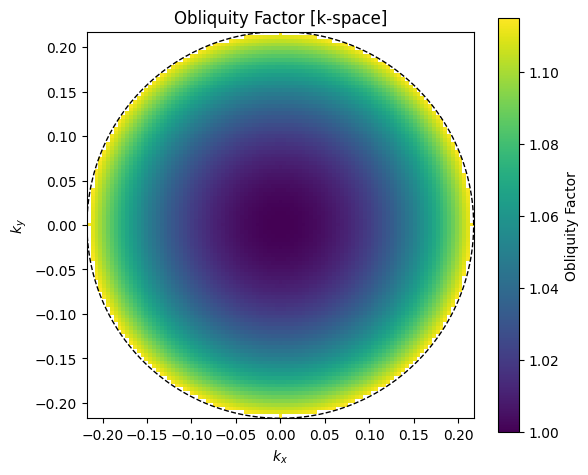

In [35]:
# 倾斜因子
N = 101
x = np.linspace(-k_pupil, k_pupil, N)
y = np.linspace(-k_pupil, k_pupil, N)
X, Y = np.meshgrid(x, y)
r_object2 = X**2 + Y**2
n_obj = 1
n_obj2 = n_obj*n_obj
cos_object2 = (n_obj2 - r_object2) / n_obj2
pupil_mask = r_object2 <= k_pupil**2

x = np.linspace(-k_propagating, k_propagating, N)
y = np.linspace(-k_propagating, k_propagating, N)
X, Y = np.meshgrid(x, y)
r_imging2 = X**2 + Y**2
n_img = 1
n_img2 = n_img * n_img
cos_imging2 = (n_img2 - r_imging2) / n_img2
# oblique_factor = np.sqrt(cos_object2/cos_imging2)

eps = 1e-12
valid = (
    (cos_object2 > 0.0) &
    (cos_imging2 > eps)
)

oblique_factor = np.zeros_like(cos_object2, dtype=np.float64)
oblique_factor[valid] = np.sqrt(
    cos_object2[valid]/cos_imging2[valid]
)
print(np.min(oblique_factor[valid]))


obliquity_masked = np.ma.masked_where(~pupil_mask, oblique_factor)
plt.figure(figsize=(6, 5))
im = plt.imshow(
    obliquity_masked,
    extent=[-k_pupil, k_pupil, -k_pupil, k_pupil],
    origin='lower'
)
plt.colorbar(im, label='Obliquity Factor')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
plt.title('Obliquity Factor [k-space]')

# draw pupil boundary
theta = np.linspace(0, 2*np.pi, 400)
plt.plot(k_pupil*np.cos(theta), k_pupil*np.sin(theta), 'k--', linewidth=1)

plt.tight_layout()
plt.show()

这是一个**根本性的问题**，问的是：

> **Obliquity factor 为什么“必然”是 cos θ，而不可能是 sin θ 或别的函数？**

下面我给你一个**严格、可证明、不可替代**的推导。不是“经验公式”，而是**从守恒定律和几何变换唯一推出 cos θ**。
我会给你 **三条相互独立、但结论一致的证明路径**，任意一条单独成立。

---

# 结论先行（你可以先记住）

> **Obliquity factor ∝ cos θ 是唯一能同时满足：**
>
> 1. 能量守恒
> 2. 坐标变量变换（立体角 → pupil 平面）
> 3. 波动方程的远场极限
>
> 的函数形式
>

---

# 证明一：能量守恒（最直观、最核心）

## 1️⃣ 物理事实（不可争辩）

* 能量流由 **Poynting 向量**决定
* 成像平面关心的是 **z 方向能量通量**

$$
\mathbf{S} = \frac{1}{\mu_0} \mathbf{E} \times \mathbf{H}
$$
对一束平面波，能流方向 **沿着 k 向量**

---

## 2️⃣ 几何关系

设波以角度 θ 入射到像平面：

* 能流方向与 z 轴夹角 = θ
* 穿过像平面的能量 = **能流在 z 方向的投影**

$$
S_z = |\mathbf{S}| \cos\theta
$$

---

## 3️⃣ 能量守恒条件

设 pupil 上每个方向对应的功率相同（这是 Debye 理论的前提）：

$$
|\mathbf{E}(\theta)|^2 \cos\theta = \text{const}
$$

因为：

$$
I \propto |\mathbf{E}|^2
$$

---

## 4️⃣ 唯一解

$$
|\mathbf{E}(\theta)| \propto \sqrt{\cos\theta}
$$
---

# 证明二：立体角 → pupil 坐标的 Jacobian（数学上唯一）

这是**最严谨、最“不可狡辩”的证明**。

---

## 1️⃣ Debye 积分的自然变量是立体角

真实的波动展开是：

$$
\mathbf{E}(\mathbf{r})=

\iint_{\Omega}
\mathbf{A}(\theta,\phi),
e^{ik\mathbf{k}\cdot\mathbf{r}}
, d\Omega
$$

其中：

$$
d\Omega = \sin\theta, d\theta, d\phi
$$

---

## 2️⃣ 数值计算用的是 pupil 平面坐标

你代码里用的是：

$$
(f_x,f_y)
=

(\sin\theta\cos\phi,;\sin\theta\sin\phi)
$$

---

## 3️⃣ 坐标变换 Jacobian（关键一步）

从 ((\theta,\phi)) 到 ((f_x,f_y))：

$$
J
=

\left|
\frac{\partial(f_x,f_y)}{\partial(\theta,\phi)}
\right|
=

\sin\theta \cos\theta
$$

---

## 4️⃣ 积分变量替换

$$
d\Omega=
\frac{1}{\cos\theta},
df_x,df_y
$$

🔴 **注意这里出现了 (1/\cos\theta)**

---

## 5️⃣ 为保持积分物理不变，振幅必须补偿

$$
|\mathbf{E}|^2 \cdot \frac{1}{\cos\theta} = \text{const}
$$

⇒

$$
\boxed{
|\mathbf{E}| \propto \sqrt{\cos\theta}
}
$$

👉 **这是 Jacobian 唯一给出的函数形式**

* 没有 sin θ 的自由度
* 没有“经验选择”的空间

---

# 证明三：远场极限（Maxwell 方程 → Debye）

从电磁理论出发。

---

## 1️⃣ 球面波远场形式

$$
\mathbf{E}(\mathbf{r})
\sim
\frac{e^{ikr}}{r}
\mathbf{E}_\infty(\theta,\phi)
$$

---

## 2️⃣ 能量通过半径 r 的球面

$$
P=
\int |\mathbf{E}_\infty|^2 , d\Omega
$$

这一步**没有 cos θ**

---

## 3️⃣ 投影到平面 z = const

通过平面的功率：

$$
P_z=

\int |\mathbf{E}_\infty|^2 \cos\theta , d\Omega
$$

---

## 4️⃣ 若不引入 cos θ 修正会发生什么？

* 大角度波贡献被**高估**
* θ → 90° 仍有能量进入像面
* 直接违反 Maxwell 方程的能流方向

---

## 5️⃣ 唯一修正方式

$$
|\mathbf{E}_\infty|^2 \cos\theta = \text{const}
$$

⇒

$$
|\mathbf{E}_\infty| \propto \sqrt{\cos\theta}
$$

---

# 最终总结（你可以当“定理”记）

> **Obliquity factor 必须是 cos θ 的函数，且是 √cos θ 级别**
>
> 因为：
>
> * cos θ 是能量通量投影
> * Jacobian 强制引入 1/cos θ
> * Maxwell 能流方向不可违背
>
> 👉 **这是唯一解，不是经验选择**
